In [2]:
import yaml
import numpy as np
import pandas as pd
from aria_data_utils.adt_data_loader import ADTSequences, ADTSubsequenceIterator

from spot_rl.models import OwlVit

In [6]:
data_path = "/checkpoint/priparashar/projectaria_tools_adt_data"
experiment_path = "/private/home/priparashar/development/SIRo/spot-sim2real/aria_data_loaders/data/close_up_object_benchmark.yaml"
adt = ADTSequences(data_path, is_path=False)
experiment = yaml.load(open(experiment_path, "r"), Loader=yaml.FullLoader)


[AriaDigitalTwinDataPathsProvider][WARNING]: no depth image data found at /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_party_seq138/1WM103600M1292_optitrack_release_multiuser_party_seq138/depth_images.vrs


In [53]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

detector = OwlVit(None, 0.25, False)
detector.prefix = "a photo of "
det_uuid = 0
result_labels = ["object_name", "confidence", "bbox", "graspability_score", "device_pose", "object_pose", "frame_id", "det_uuid", "image_path"]
for episode in list(experiment.keys()):
    results = []
    adt.load_sequence(episode)
    iterator = ADTSubsequenceIterator(adt.data, reverse=True, ns_delta=0.25 * 1e9)
    i=0
    while True:
        try:
            frame = next(iterator)
        except StopIteration:
            print("End of episode", episode)
            break
        object_names = []
        oids = []
        for object_desc in experiment[episode]:
            object_names.append(object_desc["object-description"][0])
            oids.append(object_desc["id"])
        detector.set_labels(object_names)
        # find object_name in frame here
        image = np.ascontiguousarray(frame['rectified-rgb'], dtype=np.uint8)
        # transpose image
        image = cv2.transpose(image)
        # flip image horizontally
        image = cv2.flip(image, 1)
        detections, imgs = detector.run_inference_and_return_img(
            image
        )
        if len(detections) > 0:
            plt.imsave(f'{episode}_{i}.jpg', imgs)
            for det in detections:
                # write image to disk, calculate score for detection, add to results
                det.append(frame['pose'].transform_scene_device.translation().tolist())
                oid = oids[object_names.index(det[0])]
                det.append(frame['3dbbox'][oid].transform_scene_object.translation().tolist())
                det.append(i)
                det.append(det_uuid)
                det.append(f'{episode}_{i}.jpg')
                det_uuid += 1
                results.append(det)
        i += 1
    yaml.dump(results, open(f'{episode}.yaml', 'w'))

[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiskeleton_party_seq103/1WM10360071292_optitrack_multiskeleton_party_seq103/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiskeleton_party_seq103/1WM10360071292_optitrack_multiskeleton_party_seq103/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/proje

Loaded #eyegaze records: 4297
End of episode 16


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiskeleton_party_seq101/1WM10360071292_optitrack_multiskeleton_party_seq101/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiskeleton_party_seq101/1WM10360071292_optitrack_multiskeleton_party_seq101/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/proje

Loaded #eyegaze records: 4354
End of episode 19


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_party_seq135/1WM103600M1292_optitrack_release_multiuser_party_seq135/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_party_seq135/1WM103600M1292_optitrack_release_multiuser_party_seq135/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/proje

Loaded #eyegaze records: 4265
End of episode 33
Loaded #eyegaze records: 3672


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_meal_seq136/1WM103600M1292_optitrack_release_multiuser_meal_seq136/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_meal_seq136/1WM103600M1292_optitrack_release_multiuser_meal_seq136/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectar

End of episode 37


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_meal_seq133/1WM103600M1292_optitrack_release_multiuser_meal_seq133/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_meal_seq133/1WM103600M1292_optitrack_release_multiuser_meal_seq133/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectar

Loaded #eyegaze records: 3484
End of episode 40


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_clean_seq150/1WM103600M1292_optitrack_release_clean_seq150/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_clean_seq150/1WM103600M1292_optitrack_release_clean_seq150/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_

Loaded #eyegaze records: 3541
End of episode 45
Loaded #eyegaze records: 3451


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_cook_seq147/1WM103600M1292_optitrack_release_multiuser_cook_seq147/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_cook_seq147/1WM103600M1292_optitrack_release_multiuser_cook_seq147/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectar

End of episode 49


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_seq141/1WM103600M1292_optitrack_release_meal_seq141/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_seq141/1WM103600M1292_optitrack_release_meal_seq141/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal

Loaded #eyegaze records: 3567
End of episode 92
Loaded #eyegaze records: 3797


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_seq139/1WM103600M1292_optitrack_release_meal_seq139/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_seq139/1WM103600M1292_optitrack_release_meal_seq139/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal

End of episode 93


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_seq136/1WM103600M1292_optitrack_release_meal_seq136/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_seq136/1WM103600M1292_optitrack_release_meal_seq136/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal

Loaded #eyegaze records: 3969
End of episode 96


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_decoration_seq137/1WM103600M1292_optitrack_release_decoration_seq137/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_decoration_seq137/1WM103600M1292_optitrack_release_decoration_seq137/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_dat

Loaded #eyegaze records: 3508
End of episode 101


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_decoration_seq133/1WM103600M1292_optitrack_release_decoration_seq133/video.vrs' and assigned to reader #0


Loaded #eyegaze records: 3646


[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_decoration_seq133/1WM103600M1292_optitrack_release_decoration_seq133/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_decoration_seq133/1WM103600M1292_optitrack_release_decoration_seq133/segmentations.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 400-1 activated
[VrsDataProvider][INFO]: streamId 40

End of episode 106


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_skeleton_seq136/1WM103600M1292_optitrack_release_work_skeleton_seq136/video.vrs' and assigned to reader #0


Loaded #eyegaze records: 3935


[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_skeleton_seq136/1WM103600M1292_optitrack_release_work_skeleton_seq136/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_skeleton_seq136/1WM103600M1292_optitrack_release_work_skeleton_seq136/segmentations.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 400-1 activated
[VrsDataProvider][INFO]:

End of episode 113
Loaded #eyegaze records: 3633


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_skeleton_seq140/1WM103600M1292_optitrack_release_meal_skeleton_seq140/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_meal_skeleton_seq140/1WM103600M1292_optitrack_release_meal_skeleton_seq140/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_t

End of episode 118


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_seq110/1WM103600M1292_optitrack_release_work_seq110/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_seq110/1WM103600M1292_optitrack_release_work_seq110/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work

Loaded #eyegaze records: 3590
End of episode 143


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_skeleton_seq106/1WM103600M1292_optitrack_release_work_skeleton_seq106/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_work_skeleton_seq106/1WM103600M1292_optitrack_release_work_skeleton_seq106/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_t

Loaded #eyegaze records: 4477


0m


End of episode 144


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_cook_seq114/1WM103600M1292_optitrack_release_multiuser_cook_seq114/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_cook_seq114/1WM103600M1292_optitrack_release_multiuser_cook_seq114/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectar

Loaded #eyegaze records: 3733
End of episode 157


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_cook_seq111/1WM103600M1292_optitrack_release_multiuser_cook_seq111/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Apartment_release_multiuser_cook_seq111/1WM103600M1292_optitrack_release_multiuser_cook_seq111/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectar

Loaded #eyegaze records: 3647
End of episode 159


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_BlackCeramicDishSmall_seq032/1WM09380061283_optitrack_release_recognition_BlackCeramicDishSmall_seq032/video.vrs' and assigned to reader #0


Loaded #eyegaze records: 3470


[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_BlackCeramicDishSmall_seq032/1WM09380061283_optitrack_release_recognition_BlackCeramicDishSmall_seq032/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_BlackCeramicDishSmall_seq032/1WM09380061283_optitrack_release_recognition_BlackCeramicDishSmall_seq032/segmentations.vrs' and assigned to reader #0
[Vrs

End of episode 190


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_BirdHouseToy_seq033/1WM09380061283_optitrack_release_recognition_BirdHouseToy_seq033/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_BirdHouseToy_seq033/1WM09380061283_optitrack_release_recognition_BirdHouseToy_seq033/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/ch

Loaded #eyegaze records: 3255
End of episode 198


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_GreenDecorationTall_seq031/1WM09380061283_optitrack_release_recognition_GreenDecorationTall_seq031/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_GreenDecorationTall_seq031/1WM09380061283_optitrack_release_recognition_GreenDecorationTall_seq031/instances.json
[MultiRecordFileRead

Loaded #eyegaze records: 5181
End of episode 203


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_DinoToy_seq033/1WM09380061283_optitrack_release_recognition_DinoToy_seq033/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_DinoToy_seq033/1WM09380061283_optitrack_release_recognition_DinoToy_seq033/instances.json
[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar

Loaded #eyegaze records: 3112
End of episode 209
Loaded #eyegaze records: 3153

[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_GreenDecorationTall_seq033/1WM09380061283_optitrack_release_recognition_GreenDecorationTall_seq033/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_GreenDecorationTall_seq033/1WM09380061283_optitrack_release_recognition_GreenDecorationTall_seq033/instances.json
[MultiRecordFileRead


End of episode 217


[MultiRecordFileReader][DEBUG]: Opened file '/checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_GreenDecorationTall_seq032/1WM09380061283_optitrack_release_recognition_GreenDecorationTall_seq032/video.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1 activated
[VrsDataProvider][INFO]: streamId 214-1 activated
[VrsDataProvider][INFO]: streamId 247-1 activated
[VrsDataProvider][INFO]: Timecode stream found: 285-2
[VrsDataProvider][INFO]: streamId 1201-1 activated
[VrsDataProvider][INFO]: streamId 1201-2 activated
[VrsDataProvider][INFO]: streamId 1202-1 activated
[VrsDataProvider][INFO]: streamId 1202-2 activated
[VrsDataProvider][INFO]: streamId 1203-1 activated
[AriaDigitalTwinDataProvider][INFO]: loading instance info from json file /checkpoint/priparashar/projectaria_tools_adt_data/Lite_release_recognition_GreenDecorationTall_seq032/1WM09380061283_optitrack_release_recognition_GreenDecorationTall_seq032/instances.json
[MultiRecordFileRead

Loaded #eyegaze records: 2881
End of episode 218


## Evaluating results and Testing other score formulation

There was a bug in previous score being calculated. Let's redo the scoring using
a few different w1, w2 tuples with corrected formula. We will need to find the 
top scoring image per object per episode. I will find top 5 and bottom 5 and plot
those to see if the scoring makes sense.

In [3]:
experiment_path = "/private/home/priparashar/development/SIRo/spot-sim2real/aria_data_loaders/data/close_up_object_benchmark.yaml"
experiment = yaml.load(open(experiment_path, "r"), Loader=yaml.FullLoader)

result_labels = ["object_name", "confidence", "bbox", "device_pose", "object_pose", "frame_id", "det_uuid", "image_path"]

def calculate_corrected_graspability_score(detection, image_size=(512,512), pixel_wt = 0.5):
    """Given one instance of object detection from OWL-ViT, calculate the graspability
    score.
    graspability_score = w1 * (%_of_object_pixels) + w2 * (dist_bbox_from_img_center)
    """
    center_wt = 1 - pixel_wt
    scores = []
    for det in detection:
        xmin, ymin, xmax, ymax = det[2][0], det[2][1], det[2][2], det[2][3]
        bbox_center = ((xmin + xmax) // 2, (ymin + ymax) // 2)
        img_center = (image_size[0] // 2, image_size[1] // 2)
        dist_from_center = np.linalg.norm(np.array(bbox_center) - np.array(img_center))
        dist_from_center = 1 - dist_from_center / np.linalg.norm(np.array(img_center))
        bbox_area = (xmax - xmin) * (ymax - ymin)
        img_area = image_size[0] * image_size[1]
        percent_object_pixels = bbox_area / img_area
        score = pixel_wt * percent_object_pixels + center_wt * dist_from_center
        scores.append(score.item())
    return scores

# read the yaml file
all_episode_results = pd.DataFrame()
for episode in list(experiment.keys()):
    results = yaml.load(open(f'{episode}.yaml', 'r'), Loader=yaml.FullLoader)
    results = pd.DataFrame(results, columns=result_labels)
    results["ep_id"] = episode
    all_episode_results = pd.concat([all_episode_results, results], axis=0)

In [4]:
all_episode_results["corrected_score"] = calculate_corrected_graspability_score(all_episode_results[["object_name", "confidence", "bbox"]].values.tolist(), pixel_wt=0.65)

['black cup' 'cracker box' 'bamboo plate' 'deep learning book' 'water jug'
 'chopping board' 'energy drink' 'coffee can' 'wooden bowl' 'ceramic dish'
 'chocolate cake' 'bird house' 'black bowl' 'large black dish'
 'muffin pan' 'red desk clock' 'candle tray' 'small black dish'
 'red scissors' 'air purifier' 'donut' 'flatware tray' 'mango' 'orange'
 'decorative box' 'black tablet' 'small candle tray' 'white cup'
 'green cactus decoration' 'dinosaur toy']
Average dist b/w device and object for top 5 scores per category: object_name
bird house                 0.398083
black tablet               0.390526
chocolate cake             1.741103
cracker box                1.104764
deep learning book         0.422147
dinosaur toy               0.443784
donut                      0.432094
green cactus decoration    0.527203
mango                      0.611793
orange                     0.759397
red scissors               1.085970
water jug                  0.736330
wooden bowl                1.1397

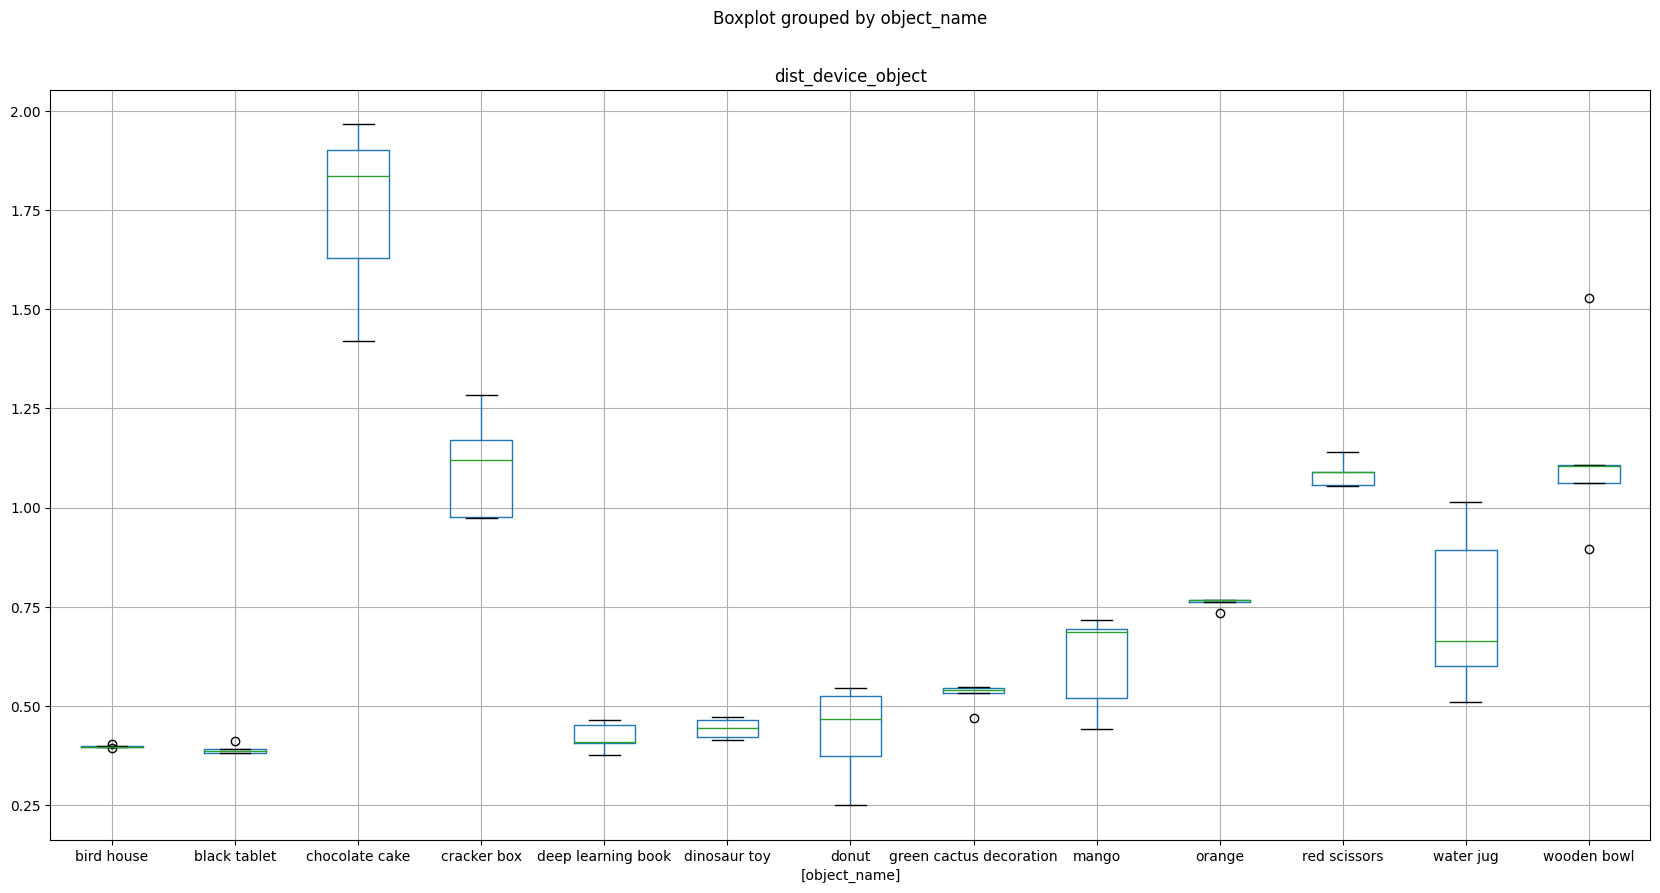

In [20]:
print(all_episode_results['object_name'].unique())
good_objects = ["chocolate cake", "orange", "mango", "donut", "bird house","wooden bowl", "dinosaur toy", "green cactus decoration", "deep learning book", "black tablet", "red scissors", "cracker box", "water jug"]
sorted_scores = all_episode_results.sort_values(by=["object_name","corrected_score"], ascending=False)
sorted_scores = sorted_scores.where(sorted_scores["object_name"].isin(good_objects)).groupby("object_name").head(5)
sorted_scores["dist_device_object"] = sorted_scores.apply(lambda row: np.linalg.norm(np.array(row["device_pose"]) - np.array(row["object_pose"])), axis=1)
sorted_scores.boxplot(column=['dist_device_object'], by=['object_name'], figsize=(20,10))
print(f'Average dist b/w device and object for top 5 scores per category: {sorted_scores.groupby("object_name")["dist_device_object"].mean()}')
print(f'Min dist b/w device and object for top 5 scores per category: {sorted_scores.groupby("object_name")["dist_device_object"].min()}')
print(f'Max dist b/w device and object for top 5 scores per category: {sorted_scores.groupby("object_name")["dist_device_object"].max()}')
print(f'Overall mean dist b/w device and object across all categories: {sorted_scores["dist_device_object"].mean()}')

In [19]:
from IPython.display import display, HTML
for object_name in good_objects:
    display(sorted_scores.where(sorted_scores["object_name"] == object_name).dropna().sort_values(by="corrected_score", ascending=False).head(10))

,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
36,chocolate cake,0.311727,"[206, 326, 259, 370]",0.135758,"[-0.6237104576914311, 1.6088170474447259, 1.88...","[-0.947326157298582, 0.890257961461497, 3.0690...",267,645,40_267.jpg,40.0,0.263865,1.419272
64,chocolate cake,0.251453,"[108, 293, 155, 329]",0.191833,"[-0.7955988071239258, 1.5885857408934718, 1.57...","[-1.127672065435394, 0.7417341159096271, 3.165...",324,332,19_324.jpg,19.0,0.222172,1.836529
67,chocolate cake,0.258481,"[73, 294, 122, 328]",0.235534,"[-0.517406184851351, 1.597755174746479, 1.5028...","[-1.127690602237561, 0.7417430598940441, 3.165...",326,335,19_326.jpg,19.0,0.191482,1.967510


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
165,orange,0.257451,"[253, 337, 290, 374]",0.140897,"[-2.7651569066610215, 1.046999782283293, -1.80...","[-2.2459138615781344, 0.486651017776524, -1.88...",73,1522,96_73.jpg,96.0,0.256594,0.767299
162,orange,0.311160,"[251, 344, 288, 383]",0.151613,"[-2.762308031504458, 1.04898370371446, -1.8186...","[-2.2459249897971203, 0.486639986286377, -1.88...",71,1519,96_71.jpg,96.0,0.249375,0.765964
144,orange,0.309968,"[243, 348, 281, 386]",0.156277,"[-2.7334396407685517, 1.045345777692208, -1.80...","[-2.21819220964525, 0.48711832365152397, -1.88...",63,1501,96_63.jpg,96.0,0.246115,0.763214
137,orange,0.360492,"[246, 352, 286, 390]",0.162321,"[-2.700256776077441, 1.0349878786557158, -1.81...","[-2.217292584460978, 0.487040913548941, -1.880...",60,1494,96_60.jpg,96.0,0.242173,0.733475
141,orange,0.336857,"[241, 353, 277, 389]",0.161349,"[-2.739284362479683, 1.045116509797698, -1.807...","[-2.218244681719472, 0.487030666007411, -1.880...",62,1498,96_62.jpg,96.0,0.242000,0.767033


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
156,mango,0.265066,"[299, 382, 364, 459]",0.258602,"[0.361057225732315, 1.467319394069309, 1.67388...","[0.5476077861379379, 1.00137284731752, 1.80808...",263,885,49_263.jpg,49.0,0.188071,0.519534
164,mango,0.444375,"[323, 374, 410, 464]",0.286514,"[-1.5401114188528058, 1.4319024186790401, 2.33...","[-1.5536528634579352, 1.022848432894218, 2.501...",278,893,49_278.jpg,49.0,0.179309,0.441394
141,mango,0.263250,"[246, 435, 298, 495]",0.295439,"[1.2165918598946242, 1.5325118607501331, 2.136...","[0.8167443141632429, 0.94058026495654, 2.18485...",283,1121,92_283.jpg,92.0,0.155095,0.715951
144,mango,0.322686,"[304, 417, 376, 501]",0.314947,"[1.161404957562905, 1.5245142515729417, 2.0725...","[0.816762012047217, 0.940623843857252, 2.18490...",290,1124,92_290.jpg,92.0,0.152609,0.687257
142,mango,0.289742,"[279, 430, 351, 506]",0.314350,"[1.181420160241542, 1.525199061167942, 2.09508...","[0.8167565986983419, 0.940609234219909, 2.1848...",288,1122,92_288.jpg,92.0,0.150829,0.694829


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
18,donut,0.303027,"[205, 279, 249, 311]",0.069806,"[-1.594697439498801, 1.58572075268715, -0.3231...","[-1.8448445793482318, 1.415505896826667, 0.130...",161,680,45_161.jpg,45.0,0.306507,0.545408
93,donut,0.274642,"[321, 381, 470, 500]",0.352295,"[-2.9502973153225267, 1.0526873485900479, -1.8...","[-2.7932190648660855, 0.87841530904175, -1.716...",90,1218,93_90.jpg,93.0,0.171032,0.249176
17,donut,0.274684,"[103, 413, 170, 477]",0.317368,"[-1.6348618536148491, 1.5654946027504502, 1.54...","[-1.4573051051108319, 1.19140911321123, 1.8585...",151,679,45_151.jpg,45.0,0.144200,0.516827
89,donut,0.252436,"[282, 461, 361, 512]",0.337772,"[-2.9571530758533466, 1.0504201287137551, -1.8...","[-2.729704836880163, 0.705024582599266, -1.755...",86,1214,93_86.jpg,93.0,0.128929,0.416965


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
13,bird house,0.317543,"[178, 131, 383, 414]",0.150491,"[-0.5444480364233549, 1.5539989124865359, -0.0...","[-0.478582533258991, 1.324354798826254, -0.389...",81,3070,198_81.jpg,198.0,0.465966,0.396737
12,bird house,0.326791,"[175, 141, 363, 404]",0.122778,"[-0.537448581292114, 1.55721043547371, -0.0643...","[-0.480063126431535, 1.323714308858386, -0.388...",80,3069,198_80.jpg,198.0,0.452669,0.403537
14,bird house,0.319863,"[197, 125, 402, 396]",0.165605,"[-0.5467936638852801, 1.5524097023554981, -0.0...","[-0.472379739470836, 1.325641317429062, -0.393...",82,3071,198_82.jpg,198.0,0.446002,0.397807
15,bird house,0.397683,"[204, 108, 412, 382]",0.182108,"[-0.544020475782067, 1.549619461433126, -0.077...","[-0.46538823084251396, 1.3294390163647158, -0....",83,3072,198_83.jpg,198.0,0.439931,0.393838
8,bird house,0.353572,"[170, 167, 366, 430]",0.158646,"[-0.510213273240013, 1.565274133924577, -0.051...","[-0.465175376482075, 1.318676227580116, -0.360...",75,3065,198_75.jpg,198.0,0.435588,0.398494


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
6,wooden bowl,0.565438,"[216, 223, 294, 291]",0.012070,"[-0.5316415438717109, 1.4412871641429308, 3.04...","[-1.303921769324542, 0.743726536253881, 3.2612...",25,735,49_25.jpg,49.0,0.361784,1.062779
5,wooden bowl,0.617395,"[224, 225, 301, 289]",0.017800,"[-0.475659331501057, 1.452774138599624, 3.0687...","[-1.303944203024597, 0.7437206865019159, 3.261...",24,734,49_24.jpg,49.0,0.356339,1.107193
367,wooden bowl,0.521159,"[208, 236, 302, 294]",0.022905,"[0.17129410248511098, 1.486465317703716, 2.521...","[0.960622237075039, 1.117018088840658, 2.72526...",243,2838,159_243.jpg,159.0,0.354764,0.894904
4,wooden bowl,0.610831,"[211, 234, 287, 297]",0.024879,"[-0.467733585458178, 1.455866590753201, 3.1401...","[-1.303930904508236, 0.743760010059866, 3.2612...",23,733,49_23.jpg,49.0,0.350849,1.104983
201,wooden bowl,0.567503,"[228, 230, 284, 269]",0.013833,"[-0.642834820159677, 1.4772489929647499, 2.093...","[-1.303970339584855, 0.743711900205403, 3.2611...",311,930,49_311.jpg,49.0,0.348648,1.529105


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
224,dinosaur toy,0.591660,"[156, 275, 320, 364]",0.118329,"[-0.301317640678879, 1.588043142303704, 0.2331...","[-0.138070268702507, 1.382430101649787, -0.150...",230,3388,209_230.jpg,209.0,0.322849,0.464975
225,dinosaur toy,0.488707,"[164, 276, 323, 362]",0.114921,"[-0.34191672958512104, 1.582290124526056, 0.22...","[-0.167973922147859, 1.3666941025407842, -0.16...",231,3389,209_231.jpg,209.0,0.321717,0.473442
152,dinosaur toy,0.527778,"[163, 268, 299, 374]",0.123677,"[-0.493255733730183, 1.557779488878547, 0.2343...","[-0.3447017549856681, 1.3140936459140558, -0.0...",158,3316,209_158.jpg,209.0,0.318419,0.414625
149,dinosaur toy,0.805150,"[177, 279, 324, 381]",0.131133,"[-0.49886529988311207, 1.5559375671582032, 0.2...","[-0.35589264935887, 1.304284843538408, -0.0681...",155,3313,209_155.jpg,209.0,0.315404,0.420998
63,dinosaur toy,0.651861,"[183, 279, 326, 392]",0.139960,"[-0.24915852557542897, 1.570188976417334, 0.27...","[-0.12414358377145501, 1.3073778061565648, -0....",67,3227,209_67.jpg,209.0,0.313670,0.444879


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
0,green cactus decoration,0.251977,"[267, 273, 370, 420]",0.179814,"[-1.000922384490722, 1.613926143470341, 0.3042...","[-0.713391224936624, 1.4776638467529708, -0.04...",11,3520,218_11.jpg,218.0,0.281888,0.469275
7,green cactus decoration,0.326361,"[222, 314, 296, 400]",0.151688,"[-0.7189710509211421, 1.5494556218016742, 0.08...","[-0.6356707611356129, 1.231287147329323, -0.34...",146,3153,203_146.jpg,203.0,0.268095,0.547663
8,green cactus decoration,0.349122,"[227, 314, 301, 401]",0.152204,"[-0.720735162412131, 1.550295481369444, 0.0924...","[-0.6330182718705579, 1.2377985441819779, -0.3...",147,3154,203_147.jpg,203.0,0.268016,0.545248
10,green cactus decoration,0.300254,"[230, 318, 313, 407]",0.161941,"[-0.7090865150950859, 1.5495296508035108, 0.09...","[-0.586389212365872, 1.242028800435391, -0.323...",149,3156,203_149.jpg,203.0,0.264820,0.533719
9,green cactus decoration,0.337754,"[230, 320, 305, 404]",0.159196,"[-0.71687670554554, 1.551167672039137, 0.09536...","[-0.615217154538316, 1.2426583636878592, -0.33...",148,3155,203_148.jpg,203.0,0.262596,0.540108


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
56,deep learning book,0.289502,"[251, 268, 498, 510]",0.359564,"[-1.842219715052731, 1.6015122012419718, 2.193...","[-2.064239478633139, 1.4242482914715409, 1.945...",293,1846,113_293.jpg,113.0,0.326325,0.377078
55,deep learning book,0.250294,"[173, 296, 394, 512]",0.298821,"[-2.7350254229752418, 0.958716945290643, -1.96...","[-2.513733455797893, 0.628179140068828, -1.877...",232,1845,113_232.jpg,113.0,0.322924,0.406554
54,deep learning book,0.287736,"[164, 316, 365, 512]",0.293630,"[-2.7621629697824006, 0.9740761740049091, -1.9...","[-2.500728728473513, 0.61330477483418, -1.8742...",231,1844,113_231.jpg,113.0,0.294743,0.452536
57,deep learning book,0.277805,"[280, 296, 510, 512]",0.375168,"[-1.8334064190843782, 1.59515495027163, 2.3705...","[-2.149823725222637, 1.388846454230535, 2.2107...",294,1847,113_294.jpg,113.0,0.276896,0.410159
53,deep learning book,0.250338,"[244, 321, 428, 514]",0.316023,"[-2.866793533421254, 1.0348420422076128, -1.91...","[-2.52504653654592, 0.721137701818092, -1.8940...",221,1843,113_221.jpg,113.0,0.264252,0.464410


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
8,black tablet,0.275206,"[32, 303, 513, 510]",0.398244,"[-2.9086033430891987, 1.043741572533778, -1.89...","[-2.6051148552023617, 0.8296830898930241, -1.8...",46,1798,113_46.jpg,113.0,0.451047,0.382093
6,black tablet,0.411022,"[172, 297, 510, 514]",0.376805,"[-2.92519616981324, 1.04691523197097, -1.89820...","[-2.617810863826612, 0.8331781859578641, -1.80...",44,1796,113_44.jpg,113.0,0.366029,0.385854
7,black tablet,0.351620,"[185, 292, 510, 512]",0.373971,"[-2.924139693785273, 1.0458756432715501, -1.89...","[-2.615473181561935, 0.839404332234309, -1.809...",45,1797,113_45.jpg,113.0,0.360971,0.382098
63,black tablet,0.409775,"[93, 344, 504, 510]",0.373312,"[-2.7133738964294456, 1.5830983552508482, -1.5...","[-2.5863581174300467, 1.269146714997551, -1.74...",307,2079,144_307.jpg,144.0,0.348943,0.411157
8,black tablet,0.262754,"[169, 311, 481, 512]",0.353932,"[-2.800905583115441, 1.076449035860302, -1.905...","[-2.5331112925640036, 0.810655207569274, -1.80...",39,2024,144_39.jpg,144.0,0.341475,0.391427


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
21,red scissors,0.291507,"[247, 236, 272, 293]",0.014518,"[1.9026805595610308, 1.5925052799920931, 2.563...","[2.9197402000427, 1.3302712440491, 2.277212619...",107,630,40_107.jpg,40.0,0.345273,1.088745
13,red scissors,0.269570,"[288, 238, 312, 298]",0.065733,"[2.040043133455436, 1.5990944993907568, 2.7982...","[2.9197402000427, 1.3302712440491, 2.277212619...",93,622,40_93.jpg,40.0,0.309480,1.057148
43,red scissors,0.277433,"[278, 197, 304, 253]",0.067348,"[1.931349871012018, 1.58035849363349, 2.785485...","[2.9197402000427, 1.3302712440491, 2.277212619...",310,652,40_310.jpg,40.0,0.308410,1.139210
14,red scissors,0.257667,"[304, 236, 329, 295]",0.086604,"[2.033313185940641, 1.597152248280986, 2.78270...","[2.9197402000427, 1.3302712440491, 2.277212619...",94,623,40_94.jpg,40.0,0.295004,1.054751
41,red scissors,0.290103,"[318, 186, 343, 243]",0.120231,"[2.037826430454554, 1.575162930698448, 2.86911...","[2.9197402000427, 1.3302712440491, 2.277212619...",307,650,40_307.jpg,40.0,0.271275,1.089996


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
355,cracker box,0.262963,"[239, 217, 276, 292]",0.008381,"[0.21439081849427302, 1.4690658681481799, 2.55...","[0.8736771526025279, 0.8938570736030799, 2.980...",238,2826,159_238.jpg,159.0,0.354719,0.974442
358,cracker box,0.285954,"[242, 219, 277, 294]",0.009150,"[0.204579204790028, 1.4657460204187032, 2.5585...","[0.873648729455763, 0.893827496897272, 2.98044...",239,2829,159_239.jpg,159.0,0.353609,0.976105
288,cracker box,0.272974,"[226, 236, 258, 289]",0.024271,"[1.313269537684234, 1.4884510225500291, 1.9326...","[0.8737204946333559, 0.893683031513985, 2.9806...",189,2759,159_189.jpg,159.0,0.339480,1.282667
347,cracker box,0.267521,"[262, 217, 293, 282]",0.034415,"[0.028381912501132003, 1.4606071460853032, 2.5...","[0.8737150226845128, 0.893562622035776, 2.9804...",235,2818,159_235.jpg,159.0,0.333596,1.120209
285,cracker box,0.267952,"[197, 243, 232, 303]",0.066582,"[1.329243027786828, 1.485129343726645, 2.07916...","[0.87375835979435, 0.893678202044908, 2.980584...",188,2756,159_188.jpg,159.0,0.311404,1.170398


,object_name,confidence,bbox,graspability_score,device_pose,object_pose,frame_id,det_uuid,image_path,ep_id,corrected_score,dist_device_object
206,water jug,0.310914,"[252, 203, 316, 304]",0.051220,"[-0.25839659174137697, 1.4664761439592282, 2.3...","[0.581688910720529, 0.8992363038593579, 2.3300...",320,935,49_320.jpg,49.0,0.338804,1.013911
138,water jug,0.268801,"[181, 217, 279, 398]",0.112892,"[0.173524763700146, 1.489786790312876, 2.42323...","[0.431236063122986, 1.032508942449103, 2.13038...",225,867,49_225.jpg,49.0,0.338641,0.601066
136,water jug,0.261104,"[198, 220, 312, 468]",0.175466,"[0.132608689588184, 1.499893722461324, 2.52498...","[0.35978342645729294, 1.090340189640254, 2.323...",214,865,49_214.jpg,49.0,0.335023,0.509719
142,water jug,0.294931,"[262, 241, 302, 305]",0.047785,"[0.125550784508734, 1.459940349745521, 2.42470...","[0.37446385290603706, 0.9330618682780941, 2.74...",77,2613,159_77.jpg,159.0,0.326316,0.662885
148,water jug,0.432996,"[205, 243, 279, 357]",0.079859,"[-0.07959881800657001, 1.4858180026702932, 2.4...","[0.581691612918168, 0.899205295966522, 2.33001...",235,877,49_235.jpg,49.0,0.326279,0.894071
